In [21]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import networkx as nx

from castle.datasets import DAG, IIDSimulation
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.algorithms import PC

In [11]:
adj_matrix = DAG.scale_free(
    n_nodes=4,
    n_edges=6,
)

dataset = IIDSimulation(
    W=adj_matrix,
    n=10000,
    method='linear',
    sem_type='gauss'
)

# dataset = IIDSimulation(
#     W=adj_matrix,
#     n=5000,
#     method='nonlinear',
#     sem_type='mim'
# )

2024-06-04 19:36:33,582 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.10/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


2024-06-04 23:09:38,503 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.10/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


2024-06-04 23:09:38,515 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.10/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset
2024-06-04 23:09:38,530 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.10/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset
2024-06-04 23:09:38,544 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.10/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset
2024-06-04 23:09:38,565 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.10/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset
2024-06-04 23:09:38,583 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.10/site-packages/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset
2024-06-04 23:09:38,594 - /opt/homebrew/Caskroom/miniconda/base/envs/causal/lib/python3.10/site-packages/

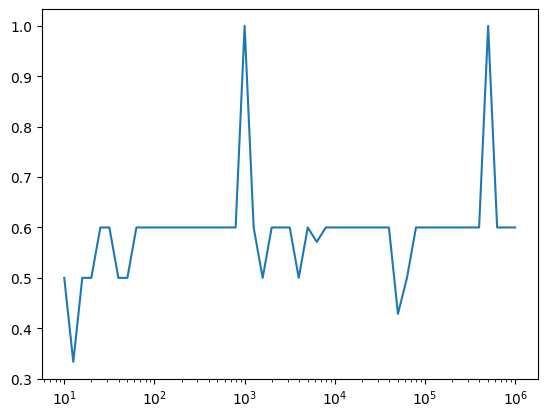

In [38]:
n_lst = np.logspace(1, 6, 51).tolist()
fdr_lst = []

for n in n_lst:

    dataset = IIDSimulation(
        W=adj_matrix,
        n=int(n),
        method='linear',
        sem_type='gauss'
    )

    pc = PC()
    pc.learn(dataset.X)
    pred_dag = pc.causal_matrix

    metrics = MetricsDAG(
        B_est=pred_dag,
        B_true=adj_matrix
    )

    fdr_lst.append(metrics.metrics["F1"])

plt.semilogx(n_lst, fdr_lst)